## Data 설명
---
[Glass Identification](https://archive.ics.uci.edu/ml/datasets/glass+identification)

1987년 법의학(Forensic Science) 분야에서 범죄 현장에서 발견된 유리 조각이 어떤 종류인지를 분류하는 규칙을 세우기 위해 사용된 자료이다.
유리의 종류별로 굴절률과 구성 성분의 함량을 측정한 자료이다. 

## 변수 설명
---

Na, Mg, Al, Si, K, Ca, Ba, Fe 등은 일정 질량의 유리 조각에서 각 성분이 차지하는 질량의 백분율이다.

| 번호 | 칼럼명 | 설명|
|:---|:---|:---|
| 1 | ID | 1에서 214 |
| 2 | RI | 굴절률 |
| 3 | Na | 나트륨 |
| 4 | Mg | 마그네슘 |
| 5 | Al | 알루미늄 |
| 6 | Si | 실리콘 |
| 7 | K | 칼륨 |
| 8 | Ca | 칼슘 |
| 9 | Ba | 바륨 |
| 10 | Fe | 철 |
| 11 | Type of Glass | 유리 종류(Target) | 

Target 종류
- 1: 플로트 공법(Float Processing)으로 만들어진 건물의 창유리
- 2: 플로트 공법(Float Processing)이 아닌 건물의 창유리
- 3: 플로트 공법 처리된 차량 유리
- 4: 플로트 공법 처리되지 않은 차량 유리
- 5: 유리 용기
- 6: 유리 잔
- 7: 전등 유리

*플로트 공법(Float Processing)란 판 유리를 만드는 공법으로 용융된 유리물을 금속 위로 흘려보내면서 균일한 두께의 판유리로 성형하는 방법이다. 

In [0]:
import pandas as pd

# 변수명이 포함되어 있지 않으므로 header=None로 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/joongyang/Machine-Learning-by-Examples/master/GlassIdentificationData.data', delimiter=',', header=None)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
0     214 non-null int64
1     214 non-null float64
2     214 non-null float64
3     214 non-null float64
4     214 non-null float64
5     214 non-null float64
6     214 non-null float64
7     214 non-null float64
8     214 non-null float64
9     214 non-null float64
10    214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [5]:
# 분석하기 쉽게 변수명을 할당해 준다.
df.columns = ['ID','X1','X2','X3','X4','X5','X6','X7','X8','X9','Y']

# target을 범주형 변수로 지정한다
df['Y'] = pd.Categorical(df['Y'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
ID    214 non-null int64
X1    214 non-null float64
X2    214 non-null float64
X3    214 non-null float64
X4    214 non-null float64
X5    214 non-null float64
X6    214 non-null float64
X7    214 non-null float64
X8    214 non-null float64
X9    214 non-null float64
Y     214 non-null category
dtypes: category(1), float64(9), int64(1)
memory usage: 17.3 KB


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
df['Y'].value_counts(sort=False)

1    70
2    76
3    17
5    13
6     9
7    29
Name: Y, dtype: int64

In [0]:
# 일련 번호를 제거한다
df = df.drop(columns=['ID'])
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [26]:
dfbin = df.loc[(df.Y == 1) | (df.Y == 2)]

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [27]:
dfbin.Y.value_counts()

2    76
1    70
7     0
6     0
5     0
3     0
Name: Y, dtype: int64

In [0]:
# features와 target을 분리한다.
X = dfbin.iloc[:,:-1]
Y = dfbin['Y']

In [0]:
# 훈련 자료와 테스트 자료에 각 분류 항목의 자료가 
# 전체 자료와 같은 비율로 들어 있도록 stratify 매개 변수에 
# target을 지정한다.
from sklearn.model_selection import train_test_split
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size=0.4, stratify=Y, random_state=201911)

정규화, 교차 검증 없이 단순하게 랜덤 포리스트 모형을 훈련한다.

In [30]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_tr, Y_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
clf.score(X_ts, Y_ts)  # 기본적으로 정확도를 계산한다.

0.9661016949152542

In [0]:
# 훈련된 모형으로 테스트 자료에 대한 예측(분류)한다.
pred = clf.predict(X_ts)

In [33]:
# 훈련된 분류 모형의 성능을 평가한다.
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_ts, pred)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[28  0]
 [ 2 29]]


([<matplotlib.axis.YTick at 0x7f852e96cc50>,
 <a list of 6 Text yticklabel objects>)

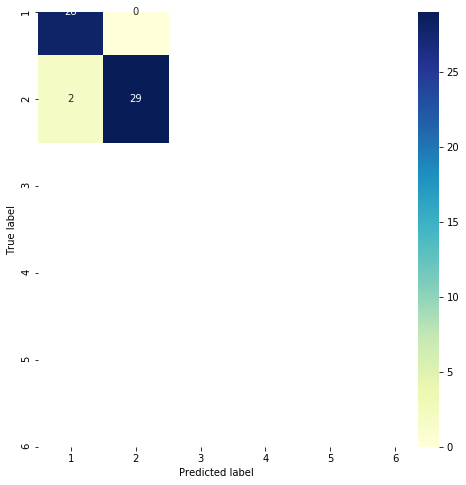

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ticks = np.arange(0.5, 6.5, 1)

plt.figure(figsize=(8, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel(ylabel='True label')
plt.xlabel(xlabel='Predicted label')
plt.xticks(ticks, ['1','2','3','4','5','6','7'], size=10)
plt.yticks(ticks, ['1','2','3','4','5','6','7'], size=10)

In [35]:
from sklearn.metrics import classification_report

print(f'성능 \n {classification_report(Y_ts, pred)}')

성능 
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        28
           2       1.00      0.94      0.97        31

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

